In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import yfinance as yf

In [2]:
tickers = [
    "^GSPC", "^DJI", "^VIX", "^GVZ", "^OVX", "^MOVE",
    "EURUSD=X", "DX-Y.NYB",
    "CL=F", "BZ=F",
    "SI=F", "PL=F", "PA=F",
    "^TNX", "GC=F",
    "GDX", "EGO", "USO"
]

# Téléchargement des données
data = yf.download(tickers, start="2011-12-15", end="2025-12-12", interval="1d",group_by="ticker")

data.columns

/tmp/ipykernel_306931/1042766611.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2011-12-15", end="2025-12-12", interval="1d",group_by="ticker")
[*********************100%***********************]  18 of 18 completed


MultiIndex([(    '^VIX',   'Open'),
            (    '^VIX',   'High'),
            (    '^VIX',    'Low'),
            (    '^VIX',  'Close'),
            (    '^VIX', 'Volume'),
            ('DX-Y.NYB',   'Open'),
            ('DX-Y.NYB',   'High'),
            ('DX-Y.NYB',    'Low'),
            ('DX-Y.NYB',  'Close'),
            ('DX-Y.NYB', 'Volume'),
            (    'PA=F',   'Open'),
            (    'PA=F',   'High'),
            (    'PA=F',    'Low'),
            (    'PA=F',  'Close'),
            (    'PA=F', 'Volume'),
            (    'BZ=F',   'Open'),
            (    'BZ=F',   'High'),
            (    'BZ=F',    'Low'),
            (    'BZ=F',  'Close'),
            (    'BZ=F', 'Volume'),
            (    '^OVX',   'Open'),
            (    '^OVX',   'High'),
            (    '^OVX',    'Low'),
            (    '^OVX',  'Close'),
            (    '^OVX', 'Volume'),
            (     'USO',   'Open'),
            (     'USO',   'High'),
            (     'USO',    

In [3]:
data.columns = [f"{field}_{ticker}" for field, ticker in data.columns]

In [4]:
pd.set_option('display.max_columns',None)
data.head()

,^VIX_Open,^VIX_High,^VIX_Low,^VIX_Close,^VIX_Volume,DX-Y.NYB_Open,DX-Y.NYB_High,DX-Y.NYB_Low,DX-Y.NYB_Close,DX-Y.NYB_Volume,PA=F_Open,PA=F_High,PA=F_Low,PA=F_Close,PA=F_Volume,BZ=F_Open,BZ=F_High,BZ=F_Low,BZ=F_Close,BZ=F_Volume,^OVX_Open,^OVX_High,^OVX_Low,^OVX_Close,^OVX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,CL=F_Volume,PL=F_Open,PL=F_High,PL=F_Low,PL=F_Close,PL=F_Volume,^TNX_Open,^TNX_High,^TNX_Low,^TNX_Close,^TNX_Volume,^GVZ_Open,^GVZ_High,^GVZ_Low,^GVZ_Close,^GVZ_Volume,^MOVE_Open,^MOVE_High,^MOVE_Low,^MOVE_Close,^MOVE_Volume,GC=F_Open,GC=F_High,GC=F_Low,GC=F_Close,GC=F_Volume,EGO_Open,EGO_High,EGO_Low,EGO_Close,EGO_Volume,SI=F_Open,SI=F_High,SI=F_Low,SI=F_Close,SI=F_Volume,^DJI_Open,^DJI_High,^DJI_Low,^DJI_Close,^DJI_Volume,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Volume,^GSPC_Open,^GSPC_High,^GSPC_Low,^GSPC_Close,^GSPC_Volume,EURUSD=X_Open,EURUSD=X_High,EURUSD=X_Low,EURUSD=X_Close,EURUSD=X_Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,24.379999,25.280001,23.879999,25.110001,0.0,80.510002,80.620003,80.110001,80.239998,0.0,614.700012,618.900024,614.599976,618.849976,10.0,106.000000,106.000000,105.089996,105.089996,399.0,43.820000,45.060001,41.939999,45.040001,0.0,295.200012,295.519989,288.399994,289.040009,1577088.0,94.889999,95.989998,93.309998,93.870003,273761.0,1406.000000,1406.000000,1406.000000,1406.000000,2.0,1.903,1.942,1.896,1.913,0.0,28.629999,28.629999,25.950001,27.280001,0.0,87.199997,87.199997,87.199997,87.199997,0.0,1571.400024,1592.800049,1565.599976,1574.599976,589.0,72.025891,73.571717,69.707149,70.431755,787940.0,28.915001,29.225,28.665001,29.225000,82.0,11825.290039,11967.839844,11825.219727,11868.809570,136930000.0,46.634784,46.749150,45.367965,45.464737,20605600.0,1212.119995,1225.599976,1212.119995,1215.750000,3.810340e+09,1.298735,1.304904,1.296294,1.298802,0.0
2011-12-16,24.160000,25.020000,23.510000,24.290001,0.0,80.209999,80.610001,79.930000,80.250000,0.0,622.599976,623.650024,622.299988,623.650024,17.0,104.239998,104.239998,102.830002,103.349998,289.0,44.099998,44.110001,41.240002,41.730000,0.0,289.440002,292.000000,285.839996,290.160004,1572350.0,93.419998,94.790001,92.519997,93.529999,205893.0,1416.300049,1416.300049,1416.300049,1416.300049,2.0,1.925,1.925,1.835,1.854,0.0,25.879999,25.920000,24.760000,24.799999,0.0,89.400002,89.400002,89.400002,89.400002,0.0,1587.400024,1595.900024,1586.000000,1595.599976,57.0,71.108057,72.557270,70.866521,72.364044,896640.0,29.750000,29.750,29.475000,29.615000,57.0,11870.250000,11968.179688,11819.309570,11866.389648,389520000.0,46.186118,46.784339,45.781441,46.344471,16285400.0,1216.089966,1231.040039,1215.199951,1219.660034,5.345800e+09,1.302999,1.308404,1.300695,1.302966,0.0
2011-12-19,25.139999,25.379999,24.379999,24.920000,0.0,80.190002,80.489998,80.110001,80.250000,0.0,615.599976,615.599976,615.599976,615.599976,15.0,104.199997,104.279999,103.230003,103.639999,265.0,41.439999,41.770000,40.540001,41.270000,0.0,291.119995,291.600006,287.440002,289.600006,927275.0,93.760002,94.419998,92.540001,93.879997,114563.0,1412.599976,1412.599976,1412.599976,1412.599976,2.0,1.858,1.878,1.801,1.813,0.0,25.520000,25.520000,23.000000,23.420000,0.0,87.599998,87.599998,87.599998,87.599998,0.0,1596.400024,1603.400024,1589.699951,1594.400024,92.0,66.760414,67.436718,62.026317,62.509388,2096700.0,29.600000,29.600,28.680000,28.822001,91.0,11866.540039,11925.879883,11735.190430,11766.259766,135170000.0,46.177325,46.230107,44.892909,45.016071,15120200.0,1219.739990,1224.569946,1202.369995,1205.349976,3.659820e+09,1.303594,1.304104,1.298499,1.303696,0.0
2011-12-20,23.559999,23.580000,22.540001,23.219999,0.0,80.309998,80.489998,79.589996,79.879997,0.0,622.450012,626.650024,622.450012,626.650024,12.0,105.500000,107.250000,105.419998,106.730003,542.0,39.410000,39.779999,38.580002,38.959999,0.0,298.399994,300.880005,297.760010,300.480011,1255200.0,94.139999,97.4499

# les Futures, indices Forex et index n'ont pas de Volume mais Yfinance remonte la même structure pour tous les tickers

## il faut les traiter

In [5]:
cols_bad_volume = [
    col for col in data.columns
    if col.endswith("_Volume") and (
        "=F" in col or   # futures
        "^" in col or   # indices, taux
        "=X" in col or  # FX pairs
        "NYB" in col    # dollar index
    )
]

data = data.drop(columns=cols_bad_volume)

In [6]:
data.head()

,^VIX_Open,^VIX_High,^VIX_Low,^VIX_Close,DX-Y.NYB_Open,DX-Y.NYB_High,DX-Y.NYB_Low,DX-Y.NYB_Close,PA=F_Open,PA=F_High,PA=F_Low,PA=F_Close,BZ=F_Open,BZ=F_High,BZ=F_Low,BZ=F_Close,^OVX_Open,^OVX_High,^OVX_Low,^OVX_Close,USO_Open,USO_High,USO_Low,USO_Close,USO_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,PL=F_Open,PL=F_High,PL=F_Low,PL=F_Close,^TNX_Open,^TNX_High,^TNX_Low,^TNX_Close,^GVZ_Open,^GVZ_High,^GVZ_Low,^GVZ_Close,^MOVE_Open,^MOVE_High,^MOVE_Low,^MOVE_Close,GC=F_Open,GC=F_High,GC=F_Low,GC=F_Close,EGO_Open,EGO_High,EGO_Low,EGO_Close,EGO_Volume,SI=F_Open,SI=F_High,SI=F_Low,SI=F_Close,^DJI_Open,^DJI_High,^DJI_Low,^DJI_Close,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Volume,^GSPC_Open,^GSPC_High,^GSPC_Low,^GSPC_Close,EURUSD=X_Open,EURUSD=X_High,EURUSD=X_Low,EURUSD=X_Close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,24.379999,25.280001,23.879999,25.110001,80.510002,80.620003,80.110001,80.239998,614.700012,618.900024,614.599976,618.849976,106.000000,106.000000,105.089996,105.089996,43.820000,45.060001,41.939999,45.040001,295.200012,295.519989,288.399994,289.040009,1577088.0,94.889999,95.989998,93.309998,93.870003,1406.000000,1406.000000,1406.000000,1406.000000,1.903,1.942,1.896,1.913,28.629999,28.629999,25.950001,27.280001,87.199997,87.199997,87.199997,87.199997,1571.400024,1592.800049,1565.599976,1574.599976,72.025891,73.571717,69.707149,70.431755,787940.0,28.915001,29.225,28.665001,29.225000,11825.290039,11967.839844,11825.219727,11868.809570,46.634784,46.749150,45.367965,45.464737,20605600.0,1212.119995,1225.599976,1212.119995,1215.750000,1.298735,1.304904,1.296294,1.298802
2011-12-16,24.160000,25.020000,23.510000,24.290001,80.209999,80.610001,79.930000,80.250000,622.599976,623.650024,622.299988,623.650024,104.239998,104.239998,102.830002,103.349998,44.099998,44.110001,41.240002,41.730000,289.440002,292.000000,285.839996,290.160004,1572350.0,93.419998,94.790001,92.519997,93.529999,1416.300049,1416.300049,1416.300049,1416.300049,1.925,1.925,1.835,1.854,25.879999,25.920000,24.760000,24.799999,89.400002,89.400002,89.400002,89.400002,1587.400024,1595.900024,1586.000000,1595.599976,71.108057,72.557270,70.866521,72.364044,896640.0,29.750000,29.750,29.475000,29.615000,11870.250000,11968.179688,11819.309570,11866.389648,46.186118,46.784339,45.781441,46.344471,16285400.0,1216.089966,1231.040039,1215.199951,1219.660034,1.302999,1.308404,1.300695,1.302966
2011-12-19,25.139999,25.379999,24.379999,24.920000,80.190002,80.489998,80.110001,80.250000,615.599976,615.599976,615.599976,615.599976,104.199997,104.279999,103.230003,103.639999,41.439999,41.770000,40.540001,41.270000,291.119995,291.600006,287.440002,289.600006,927275.0,93.760002,94.419998,92.540001,93.879997,1412.599976,1412.599976,1412.599976,1412.599976,1.858,1.878,1.801,1.813,25.520000,25.520000,23.000000,23.420000,87.599998,87.599998,87.599998,87.599998,1596.400024,1603.400024,1589.699951,1594.400024,66.760414,67.436718,62.026317,62.509388,2096700.0,29.600000,29.600,28.680000,28.822001,11866.540039,11925.879883,11735.190430,11766.259766,46.177325,46.230107,44.892909,45.016071,15120200.0,1219.739990,1224.569946,1202.369995,1205.349976,1.303594,1.304104,1.298499,1.303696
2011-12-20,23.559999,23.580000,22.540001,23.219999,80.309998,80.489998,79.589996,79.879997,622.450012,626.650024,622.450012,626.650024,105.500000,107.250000,105.419998,106.730003,39.410000,39.779999,38.580002,38.959999,298.399994,300.880005,297.760010,300.480011,1255200.0,94.139999,97.449997,94.139999,97.220001,1431.900024,1431.900024,1431.900024,1431.900024,1.847,1.929,1.847,1.925,22.219999,22.260000,21.020000,21.330000,92.300003,92.300003,92.300003,92.300003,1596.400024,1617.000000,1596.400024,1615.599976,64.200133,65.794269,63.765372,64.731514,875320.0,29.230000,29.496,29.200001,29.496000,11769.209961,12117.129883,11768.830078,12103.580078,46.080545,46.845913,46.071745,46.617184,11644900.0,1205.719971,1242.819946,1205.719971,1241.300049,1.300796,1.313198,1.299697,1.3

In [7]:
# Nettoyage des noms de colonnes
data.columns = (
    pd.Index(data.columns)
        .str.replace(r'^\^', '', regex=True)  # retire ^ au début
        .str.replace('=', '_')                # remplace = par _
)

In [8]:
data.head()

,VIX_Open,VIX_High,VIX_Low,VIX_Close,DX-Y.NYB_Open,DX-Y.NYB_High,DX-Y.NYB_Low,DX-Y.NYB_Close,PA_F_Open,PA_F_High,PA_F_Low,PA_F_Close,BZ_F_Open,BZ_F_High,BZ_F_Low,BZ_F_Close,OVX_Open,OVX_High,OVX_Low,OVX_Close,USO_Open,USO_High,USO_Low,USO_Close,USO_Volume,CL_F_Open,CL_F_High,CL_F_Low,CL_F_Close,PL_F_Open,PL_F_High,PL_F_Low,PL_F_Close,TNX_Open,TNX_High,TNX_Low,TNX_Close,GVZ_Open,GVZ_High,GVZ_Low,GVZ_Close,MOVE_Open,MOVE_High,MOVE_Low,MOVE_Close,GC_F_Open,GC_F_High,GC_F_Low,GC_F_Close,EGO_Open,EGO_High,EGO_Low,EGO_Close,EGO_Volume,SI_F_Open,SI_F_High,SI_F_Low,SI_F_Close,DJI_Open,DJI_High,DJI_Low,DJI_Close,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Volume,GSPC_Open,GSPC_High,GSPC_Low,GSPC_Close,EURUSD_X_Open,EURUSD_X_High,EURUSD_X_Low,EURUSD_X_Close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,24.379999,25.280001,23.879999,25.110001,80.510002,80.620003,80.110001,80.239998,614.700012,618.900024,614.599976,618.849976,106.000000,106.000000,105.089996,105.089996,43.820000,45.060001,41.939999,45.040001,295.200012,295.519989,288.399994,289.040009,1577088.0,94.889999,95.989998,93.309998,93.870003,1406.000000,1406.000000,1406.000000,1406.000000,1.903,1.942,1.896,1.913,28.629999,28.629999,25.950001,27.280001,87.199997,87.199997,87.199997,87.199997,1571.400024,1592.800049,1565.599976,1574.599976,72.025891,73.571717,69.707149,70.431755,787940.0,28.915001,29.225,28.665001,29.225000,11825.290039,11967.839844,11825.219727,11868.809570,46.634784,46.749150,45.367965,45.464737,20605600.0,1212.119995,1225.599976,1212.119995,1215.750000,1.298735,1.304904,1.296294,1.298802
2011-12-16,24.160000,25.020000,23.510000,24.290001,80.209999,80.610001,79.930000,80.250000,622.599976,623.650024,622.299988,623.650024,104.239998,104.239998,102.830002,103.349998,44.099998,44.110001,41.240002,41.730000,289.440002,292.000000,285.839996,290.160004,1572350.0,93.419998,94.790001,92.519997,93.529999,1416.300049,1416.300049,1416.300049,1416.300049,1.925,1.925,1.835,1.854,25.879999,25.920000,24.760000,24.799999,89.400002,89.400002,89.400002,89.400002,1587.400024,1595.900024,1586.000000,1595.599976,71.108057,72.557270,70.866521,72.364044,896640.0,29.750000,29.750,29.475000,29.615000,11870.250000,11968.179688,11819.309570,11866.389648,46.186118,46.784339,45.781441,46.344471,16285400.0,1216.089966,1231.040039,1215.199951,1219.660034,1.302999,1.308404,1.300695,1.302966
2011-12-19,25.139999,25.379999,24.379999,24.920000,80.190002,80.489998,80.110001,80.250000,615.599976,615.599976,615.599976,615.599976,104.199997,104.279999,103.230003,103.639999,41.439999,41.770000,40.540001,41.270000,291.119995,291.600006,287.440002,289.600006,927275.0,93.760002,94.419998,92.540001,93.879997,1412.599976,1412.599976,1412.599976,1412.599976,1.858,1.878,1.801,1.813,25.520000,25.520000,23.000000,23.420000,87.599998,87.599998,87.599998,87.599998,1596.400024,1603.400024,1589.699951,1594.400024,66.760414,67.436718,62.026317,62.509388,2096700.0,29.600000,29.600,28.680000,28.822001,11866.540039,11925.879883,11735.190430,11766.259766,46.177325,46.230107,44.892909,45.016071,15120200.0,1219.739990,1224.569946,1202.369995,1205.349976,1.303594,1.304104,1.298499,1.303696
2011-12-20,23.559999,23.580000,22.540001,23.219999,80.309998,80.489998,79.589996,79.879997,622.450012,626.650024,622.450012,626.650024,105.500000,107.250000,105.419998,106.730003,39.410000,39.779999,38.580002,38.959999,298.399994,300.880005,297.760010,300.480011,1255200.0,94.139999,97.449997,94.139999,97.220001,1431.900024,1431.900024,1431.900024,1431.900024,1.847,1.929,1.847,1.925,22.219999,22.260000,21.020000,21.330000,92.300003,92.300003,92.300003,92.300003,1596.400024,1617.000000,1596.400024,1615.599976,64.200133,65.794269,63.765372,64.731514,875320.0,29.230000,29.496,29.200001,29.496000,11769.209961,12117.129883,11768.830078,12103.580078,46.080545,46.845913,46.071745,46.617184,11644900.0,1205.719971,1242.819946,1205.719971,1241.300049,1.300796,1.313198,1.299697,1.300779
2011-12-21,22.520000,2

In [9]:
data.shape

(3649, 75)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3649 entries, 2011-12-15 to 2025-12-11
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VIX_Open        3518 non-null   float64
 1   VIX_High        3518 non-null   float64
 2   VIX_Low         3518 non-null   float64
 3   VIX_Close       3518 non-null   float64
 4   DX-Y.NYB_Open   3519 non-null   float64
 5   DX-Y.NYB_High   3519 non-null   float64
 6   DX-Y.NYB_Low    3519 non-null   float64
 7   DX-Y.NYB_Close  3519 non-null   float64
 8   PA_F_Open       3515 non-null   float64
 9   PA_F_High       3515 non-null   float64
 10  PA_F_Low        3515 non-null   float64
 11  PA_F_Close      3515 non-null   float64
 12  BZ_F_Open       3501 non-null   float64
 13  BZ_F_High       3501 non-null   float64
 14  BZ_F_Low        3501 non-null   float64
 15  BZ_F_Close      3501 non-null   float64
 16  OVX_Open        3518 non-null   float64
 17  OVX_High       

# On vire tous les NA

In [11]:
data = data.dropna()

In [12]:
data.shape

(3414, 75)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3414 entries, 2011-12-15 to 2025-12-11
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VIX_Open        3414 non-null   float64
 1   VIX_High        3414 non-null   float64
 2   VIX_Low         3414 non-null   float64
 3   VIX_Close       3414 non-null   float64
 4   DX-Y.NYB_Open   3414 non-null   float64
 5   DX-Y.NYB_High   3414 non-null   float64
 6   DX-Y.NYB_Low    3414 non-null   float64
 7   DX-Y.NYB_Close  3414 non-null   float64
 8   PA_F_Open       3414 non-null   float64
 9   PA_F_High       3414 non-null   float64
 10  PA_F_Low        3414 non-null   float64
 11  PA_F_Close      3414 non-null   float64
 12  BZ_F_Open       3414 non-null   float64
 13  BZ_F_High       3414 non-null   float64
 14  BZ_F_Low        3414 non-null   float64
 15  BZ_F_Close      3414 non-null   float64
 16  OVX_Open        3414 non-null   float64
 17  OVX_High       

In [14]:
cols_useless = [
    col for col in data.columns
    if data[col].isna().all()              # 1. tout est NaN
    or data[col].eq(0).all()               # 2. tout est 0
    or data[col].dropna().eq(0).all()      # 3. tout ce qui n'est pas NaN vaut 0
]

data = data.drop(columns=cols_useless)

In [15]:
data.head()

,VIX_Open,VIX_High,VIX_Low,VIX_Close,DX-Y.NYB_Open,DX-Y.NYB_High,DX-Y.NYB_Low,DX-Y.NYB_Close,PA_F_Open,PA_F_High,PA_F_Low,PA_F_Close,BZ_F_Open,BZ_F_High,BZ_F_Low,BZ_F_Close,OVX_Open,OVX_High,OVX_Low,OVX_Close,USO_Open,USO_High,USO_Low,USO_Close,USO_Volume,CL_F_Open,CL_F_High,CL_F_Low,CL_F_Close,PL_F_Open,PL_F_High,PL_F_Low,PL_F_Close,TNX_Open,TNX_High,TNX_Low,TNX_Close,GVZ_Open,GVZ_High,GVZ_Low,GVZ_Close,MOVE_Open,MOVE_High,MOVE_Low,MOVE_Close,GC_F_Open,GC_F_High,GC_F_Low,GC_F_Close,EGO_Open,EGO_High,EGO_Low,EGO_Close,EGO_Volume,SI_F_Open,SI_F_High,SI_F_Low,SI_F_Close,DJI_Open,DJI_High,DJI_Low,DJI_Close,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Volume,GSPC_Open,GSPC_High,GSPC_Low,GSPC_Close,EURUSD_X_Open,EURUSD_X_High,EURUSD_X_Low,EURUSD_X_Close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,24.379999,25.280001,23.879999,25.110001,80.510002,80.620003,80.110001,80.239998,614.700012,618.900024,614.599976,618.849976,106.000000,106.000000,105.089996,105.089996,43.820000,45.060001,41.939999,45.040001,295.200012,295.519989,288.399994,289.040009,1577088.0,94.889999,95.989998,93.309998,93.870003,1406.000000,1406.000000,1406.000000,1406.000000,1.903,1.942,1.896,1.913,28.629999,28.629999,25.950001,27.280001,87.199997,87.199997,87.199997,87.199997,1571.400024,1592.800049,1565.599976,1574.599976,72.025891,73.571717,69.707149,70.431755,787940.0,28.915001,29.225,28.665001,29.225000,11825.290039,11967.839844,11825.219727,11868.809570,46.634784,46.749150,45.367965,45.464737,20605600.0,1212.119995,1225.599976,1212.119995,1215.750000,1.298735,1.304904,1.296294,1.298802
2011-12-16,24.160000,25.020000,23.510000,24.290001,80.209999,80.610001,79.930000,80.250000,622.599976,623.650024,622.299988,623.650024,104.239998,104.239998,102.830002,103.349998,44.099998,44.110001,41.240002,41.730000,289.440002,292.000000,285.839996,290.160004,1572350.0,93.419998,94.790001,92.519997,93.529999,1416.300049,1416.300049,1416.300049,1416.300049,1.925,1.925,1.835,1.854,25.879999,25.920000,24.760000,24.799999,89.400002,89.400002,89.400002,89.400002,1587.400024,1595.900024,1586.000000,1595.599976,71.108057,72.557270,70.866521,72.364044,896640.0,29.750000,29.750,29.475000,29.615000,11870.250000,11968.179688,11819.309570,11866.389648,46.186118,46.784339,45.781441,46.344471,16285400.0,1216.089966,1231.040039,1215.199951,1219.660034,1.302999,1.308404,1.300695,1.302966
2011-12-19,25.139999,25.379999,24.379999,24.920000,80.190002,80.489998,80.110001,80.250000,615.599976,615.599976,615.599976,615.599976,104.199997,104.279999,103.230003,103.639999,41.439999,41.770000,40.540001,41.270000,291.119995,291.600006,287.440002,289.600006,927275.0,93.760002,94.419998,92.540001,93.879997,1412.599976,1412.599976,1412.599976,1412.599976,1.858,1.878,1.801,1.813,25.520000,25.520000,23.000000,23.420000,87.599998,87.599998,87.599998,87.599998,1596.400024,1603.400024,1589.699951,1594.400024,66.760414,67.436718,62.026317,62.509388,2096700.0,29.600000,29.600,28.680000,28.822001,11866.540039,11925.879883,11735.190430,11766.259766,46.177325,46.230107,44.892909,45.016071,15120200.0,1219.739990,1224.569946,1202.369995,1205.349976,1.303594,1.304104,1.298499,1.303696
2011-12-20,23.559999,23.580000,22.540001,23.219999,80.309998,80.489998,79.589996,79.879997,622.450012,626.650024,622.450012,626.650024,105.500000,107.250000,105.419998,106.730003,39.410000,39.779999,38.580002,38.959999,298.399994,300.880005,297.760010,300.480011,1255200.0,94.139999,97.449997,94.139999,97.220001,1431.900024,1431.900024,1431.900024,1431.900024,1.847,1.929,1.847,1.925,22.219999,22.260000,21.020000,21.330000,92.300003,92.300003,92.300003,92.300003,1596.400024,1617.000000,1596.400024,1615.599976,64.200133,65.794269,63.765372,64.731514,875320.0,29.230000,29.496,29.200001,29.496000,11769.209961,12117.129883,11768.830078,12103.580078,46.080545,46.845913,46.071745,46.617184,11644900.0,1205.719971,1242.819946,1205.719971,1241.300049,1.300796,1.313198,1.299697,1.300779
2011-12-21,22.520000,2

In [16]:
#data = data.ffill()

In [17]:
def check_nan_and_zero_positions(df):
    report = {}

    for col in df.columns:
        s = df[col]

        # index de la première valeur non-NaN
        first_valid = s.first_valid_index()

        if first_valid is None:
            # colonne entièrement NaN (normalement supprimée avant)
            report[col] = "⚠️ Colonne entièrement NaN"
            continue

        # Segment après la première valeur valide
        segment = s.loc[first_valid:]

        # vérifier s'il existe des NaN après la première valeur valide
        has_late_nan = segment.isna().any()
        has_late_zero = segment.eq(0).any()

        if has_late_nan and has_late_zero:
            report[col] = "❌ NaN et 0 après le début réel (problème)"
        elif has_late_nan:
            report[col] = "❌ NaN après le début réel (problème)"
        elif has_late_zero:
            report[col] = "❌ 0 après le début réel (problème)"
        else:
            report[col] = "✅ Aucun NaN ni 0 après le début réel"

    return pd.Series(report)

nan_report = check_nan_and_zero_positions(data)
pd.set_option('display.max_rows', None)
nan_report


VIX_Open          ✅ Aucun NaN ni 0 après le début réel
VIX_High          ✅ Aucun NaN ni 0 après le début réel
VIX_Low           ✅ Aucun NaN ni 0 après le début réel
VIX_Close         ✅ Aucun NaN ni 0 après le début réel
DX-Y.NYB_Open     ✅ Aucun NaN ni 0 après le début réel
DX-Y.NYB_High     ✅ Aucun NaN ni 0 après le début réel
DX-Y.NYB_Low      ✅ Aucun NaN ni 0 après le début réel
DX-Y.NYB_Close    ✅ Aucun NaN ni 0 après le début réel
PA_F_Open         ✅ Aucun NaN ni 0 après le début réel
PA_F_High         ✅ Aucun NaN ni 0 après le début réel
PA_F_Low          ✅ Aucun NaN ni 0 après le début réel
PA_F_Close        ✅ Aucun NaN ni 0 après le début réel
BZ_F_Open         ✅ Aucun NaN ni 0 après le début réel
BZ_F_High         ✅ Aucun NaN ni 0 après le début réel
BZ_F_Low          ✅ Aucun NaN ni 0 après le début réel
BZ_F_Close        ✅ Aucun NaN ni 0 après le début réel
OVX_Open          ✅ Aucun NaN ni 0 après le début réel
OVX_High          ✅ Aucun NaN ni 0 après le début réel
OVX_Low   

GC_F_Close    1.000000
GC_F_Low      0.999847
GC_F_High     0.999791
GC_F_Open     0.999592
GDX_Close     0.871632
GDX_High      0.871360
GDX_Low       0.870974
GDX_Open      0.870271
SI_F_Low      0.861570
SI_F_Close    0.861292
SI_F_High     0.861093
SI_F_Open     0.860885
GSPC_High     0.846219
GSPC_Close    0.846063
GSPC_Open     0.845897
GSPC_Low      0.845646
DJI_High      0.792977
DJI_Close     0.792741
DJI_Open      0.792466
DJI_Low       0.792257
TNX_Close     0.536880
TNX_High      0.536672
TNX_Low       0.536580
TNX_Open      0.536462
MOVE_High     0.367986
Name: GC_F_Close, dtype: float64


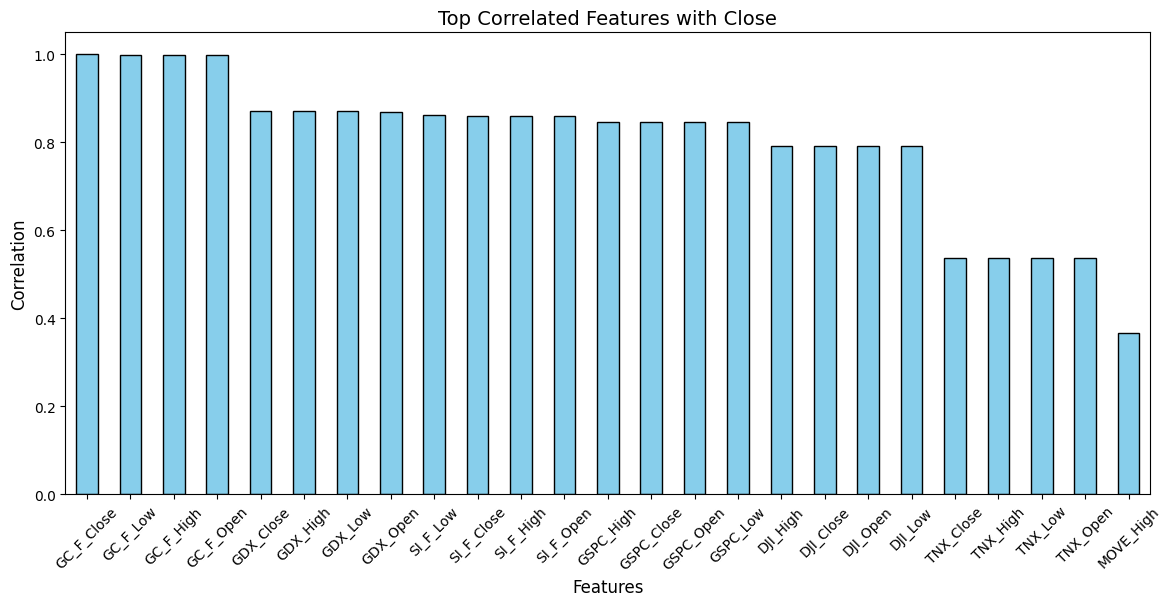

In [18]:
corr_matrix = data.corr()
top_corr = corr_matrix["GC_F_Close"].sort_values(ascending=False).head(25)
print(top_corr)

plt.figure(figsize=(14,6))
top_corr.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top Correlated Features with Close", fontsize=14)
plt.ylabel("Correlation", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [19]:
#data['GC_F_Close'] = data['GC_F_Close'].ffill().bfill()

In [20]:
data['GC_F_Close'].isna().sum()

0

In [21]:
data['GC_F_Close']

Date
2011-12-15    1574.599976
2011-12-16    1595.599976
2011-12-19    1594.400024
2011-12-20    1615.599976
2011-12-21    1611.900024
2011-12-22    1608.900024
2011-12-23    1604.699951
2011-12-27    1594.199951
2011-12-28    1562.900024
2011-12-29    1539.900024
2011-12-30    1565.800049
2012-01-03    1599.699951
2012-01-04    1611.900024
2012-01-05    1619.400024
2012-01-06    1616.099976
2012-01-09    1607.500000
2012-01-10    1631.000000
2012-01-11    1639.199951
2012-01-12    1647.300049
2012-01-13    1630.400024
2012-01-17    1655.199951
2012-01-18    1659.500000
2012-01-19    1654.099976
2012-01-20    1663.699951
2012-01-23    1678.000000
2012-01-24    1664.199951
2012-01-25    1699.800049
2012-01-26    1726.300049
2012-01-27    1731.800049
2012-01-30    1731.000000
2012-01-31    1737.800049
2012-02-01    1747.099976
2012-02-02    1756.800049
2012-02-03    1737.900024
2012-02-06    1722.800049
2012-02-07    1746.400024
2012-02-08    1729.300049
2012-02-09    1739.000000
2012-02

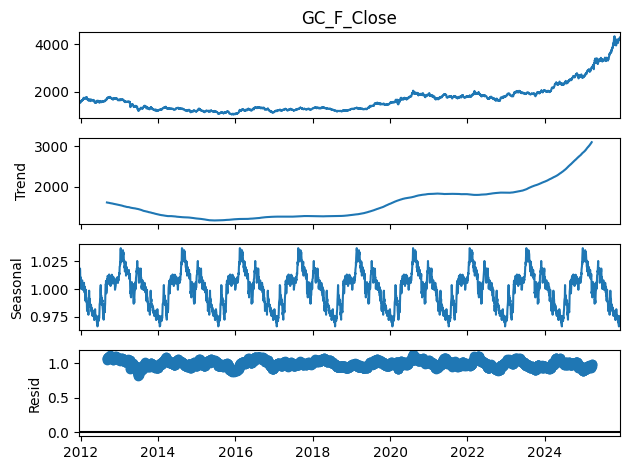

In [22]:
decomposition = seasonal_decompose(data['GC_F_Close'], model='multiplicative', period=365)
decomposition.plot()
plt.show()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def compute_vif(df):
    vif = pd.DataFrame()
    vif["feature"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i)
                  for i in range(df.shape[1])]
    return vif

In [24]:
print(data.index.is_monotonic_increasing)  # should be True
print(data.index.freq)         # should be True

True
None


In [25]:
data = data.asfreq('D')

In [26]:
print(data.index.is_monotonic_increasing)  # should be True
print(data.index.freq)

True
<Day>


In [27]:
data.isnull().sum()

VIX_Open          1697
VIX_High          1697
VIX_Low           1697
VIX_Close         1697
DX-Y.NYB_Open     1697
DX-Y.NYB_High     1697
DX-Y.NYB_Low      1697
DX-Y.NYB_Close    1697
PA_F_Open         1697
PA_F_High         1697
PA_F_Low          1697
PA_F_Close        1697
BZ_F_Open         1697
BZ_F_High         1697
BZ_F_Low          1697
BZ_F_Close        1697
OVX_Open          1697
OVX_High          1697
OVX_Low           1697
OVX_Close         1697
USO_Open          1697
USO_High          1697
USO_Low           1697
USO_Close         1697
USO_Volume        1697
CL_F_Open         1697
CL_F_High         1697
CL_F_Low          1697
CL_F_Close        1697
PL_F_Open         1697
PL_F_High         1697
PL_F_Low          1697
PL_F_Close        1697
TNX_Open          1697
TNX_High          1697
TNX_Low           1697
TNX_Close         1697
GVZ_Open          1697
GVZ_High          1697
GVZ_Low           1697
GVZ_Close         1697
MOVE_Open         1697
MOVE_High         1697
MOVE_Low   

In [28]:
pd.set_option('display.max_rows',10)
data

,VIX_Open,VIX_High,VIX_Low,VIX_Close,DX-Y.NYB_Open,DX-Y.NYB_High,DX-Y.NYB_Low,DX-Y.NYB_Close,PA_F_Open,PA_F_High,PA_F_Low,PA_F_Close,BZ_F_Open,BZ_F_High,BZ_F_Low,BZ_F_Close,OVX_Open,OVX_High,OVX_Low,OVX_Close,USO_Open,USO_High,USO_Low,USO_Close,USO_Volume,CL_F_Open,CL_F_High,CL_F_Low,CL_F_Close,PL_F_Open,PL_F_High,PL_F_Low,PL_F_Close,TNX_Open,TNX_High,TNX_Low,TNX_Close,GVZ_Open,GVZ_High,GVZ_Low,GVZ_Close,MOVE_Open,MOVE_High,MOVE_Low,MOVE_Close,GC_F_Open,GC_F_High,GC_F_Low,GC_F_Close,EGO_Open,EGO_High,EGO_Low,EGO_Close,EGO_Volume,SI_F_Open,SI_F_High,SI_F_Low,SI_F_Close,DJI_Open,DJI_High,DJI_Low,DJI_Close,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Volume,GSPC_Open,GSPC_High,GSPC_Low,GSPC_Close,EURUSD_X_Open,EURUSD_X_High,EURUSD_X_Low,EURUSD_X_Close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,24.379999,25.280001,23.879999,25.110001,80.510002,80.620003,80.110001,80.239998,614.700012,618.900024,614.599976,618.849976,106.000000,106.000000,105.089996,105.089996,43.820000,45.060001,41.939999,45.040001,295.200012,295.519989,288.399994,289.040009,1577088.0,94.889999,95.989998,93.309998,93.870003,1406.000000,1406.000000,1406.000000,1406.000000,1.903,1.942,1.896,1.913,28.629999,28.629999,25.950001,27.280001,87.199997,87.199997,87.199997,87.199997,1571.400024,1592.800049,1565.599976,1574.599976,72.025891,73.571717,69.707149,70.431755,787940.0,28.915001,29.225000,28.665001,29.225000,11825.290039,11967.839844,11825.219727,11868.809570,46.634784,46.749150,45.367965,45.464737,20605600.0,1212.119995,1225.599976,1212.119995,1215.750000,1.298735,1.304904,1.296294,1.298802
2011-12-16,24.160000,25.020000,23.510000,24.290001,80.209999,80.610001,79.930000,80.250000,622.599976,623.650024,622.299988,623.650024,104.239998,104.239998,102.830002,103.349998,44.099998,44.110001,41.240002,41.730000,289.440002,292.000000,285.839996,290.160004,1572350.0,93.419998,94.790001,92.519997,93.529999,1416.300049,1416.300049,1416.300049,1416.300049,1.925,1.925,1.835,1.854,25.879999,25.920000,24.760000,24.799999,89.400002,89.400002,89.400002,89.400002,1587.400024,1595.900024,1586.000000,1595.599976,71.108057,72.557270,70.866521,72.364044,896640.0,29.750000,29.750000,29.475000,29.615000,11870.250000,11968.179688,11819.309570,11866.389648,46.186118,46.784339,45.781441,46.344471,16285400.0,1216.089966,1231.040039,1215.199951,1219.660034,1.302999,1.308404,1.300695,1.302966
2011-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-19,25.139999,25.379999,24.379999,24.920000,80.190002,80.489998,80.110001,80.250000,615.599976,615.599976,615.599976,615.599976,104.199997,104.279999,103.230003,103.639999,41.439999,41.770000,40.540001,41.270000,291.119995,291.600006,287.440002,289.600006,927275.0,93.760002,94.419998,92.540001,93.879997,1412.599976,1412.599976,1412.599976,1412.599976,1.858,1.878,1.801,1.813,25.520000,25.520000,23.000000,23.420000,87.599998,87.599998,87.599998,87.599998,1596.400024,1603.400024,1589.699951,1594.400024,66.760414,67.436718,62.026317,62.509388,2096700.0,29.600000,29.600000,28.680000,28.822001,11866.540039,11925.879883,11735.190430,11766.259766,46.177325,46.230107,44.892909,45.016071,15120200.0,1219.739990,1224.569946,1202.369995,1205.349976,1.303594,1.304104,1.298499,1.303696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [29]:
df = data

Text(0.5, 1.0, 'Missing Gold Prices by Day of Year (across all years)')

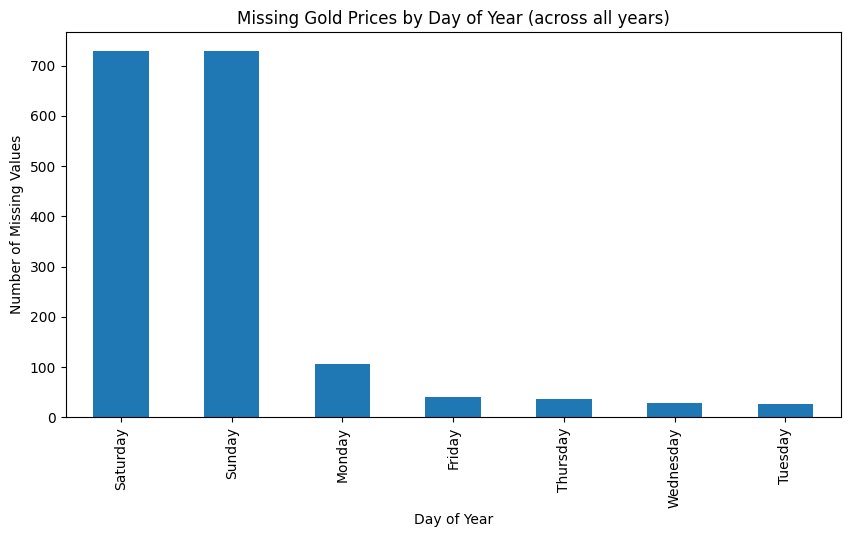

In [30]:
df.index = pd.to_datetime(df.index)  # make sure datetime

df["day"] = df.index.day_name()
nulls = df["GC_F_Close"].isna().groupby(df["day"]).sum()
# Reorder to Mon–Sun (otherwise it’s alphabetical)
# weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
# nulls = nulls.reindex(weekday_order)

top10=nulls.nlargest(10)
plt.figure(figsize=(10,5))
top10.plot(kind="bar")
plt.xlabel('Day of Year')
plt.ylabel('Number of Missing Values')
plt.title('Missing Gold Prices by Day of Year (across all years)')

In [31]:
df = df.drop('day',axis=1)

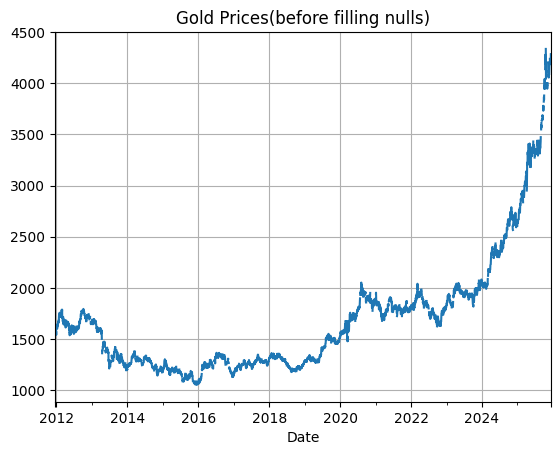

In [32]:
df['GC_F_Close'].plot(title='Gold Prices(before filling nulls)')
plt.grid(True)

In [33]:
df = df[df.index.dayofweek < 5]
df = df.asfreq('B')
#fill nulls
#fill close coln only
df["GC_F_Close"] = df["GC_F_Close"].interpolate(method="linear")

In [34]:
df["GC_F_Close"].isna().sum()

0

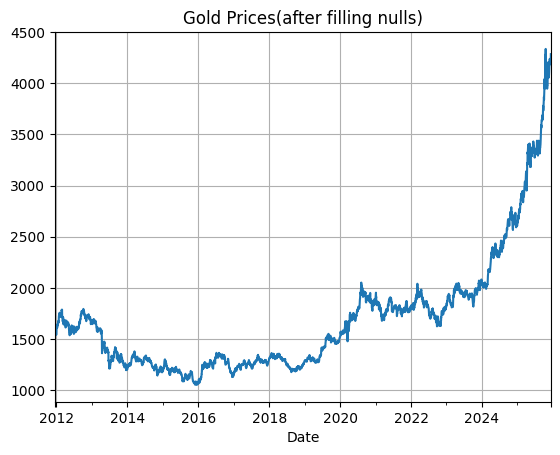

In [35]:
df["GC_F_Close"].plot(title='Gold Prices(after filling nulls)')
plt.grid(True)

Text(0.5, 1.0, 'Rolling Mean & Variance')

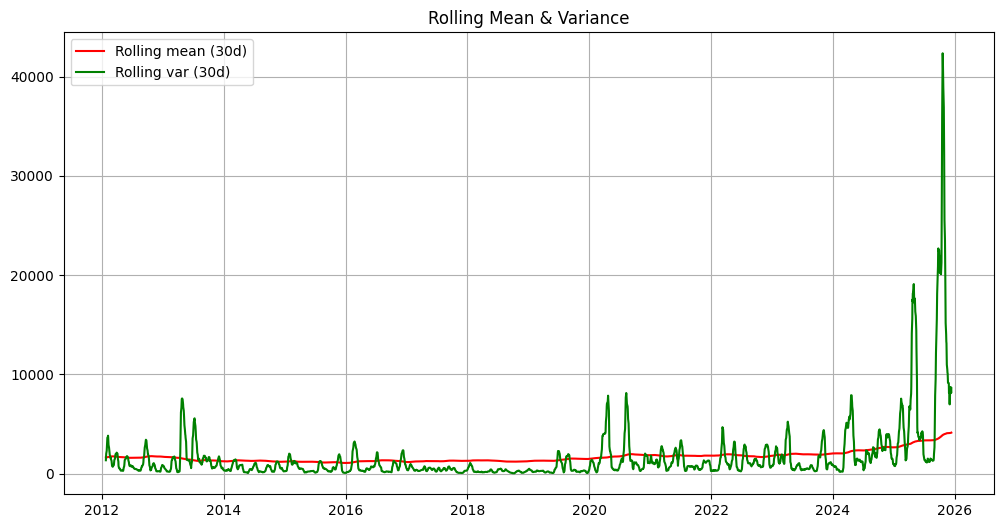

In [36]:
from statsmodels.tsa.stattools import adfuller

rolling_mean = df["GC_F_Close"].rolling(window=30).mean()
rolling_variance = df["GC_F_Close"].rolling(window=30).var()
plt.figure(figsize=(12,6))
plt.plot(rolling_mean,color="red",label="Rolling mean (30d)")
plt.plot(rolling_variance,color="green",label="Rolling var (30d)")
plt.legend()
plt.grid(True)
plt.title("Rolling Mean & Variance")

In [37]:
result = adfuller(df["GC_F_Close"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: 4.543633624630309
p-value: 1.0
Critical Values: {'1%': -3.4321567201852456, '5%': -2.862338308122449, '10%': -2.5671949518327932}


# Lags and rolling

In [38]:
df['close_diff1'] = df['GC_F_Close'].diff().dropna()

In [39]:
df['target_tomorrow']=df['GC_F_Close'].shift(-1)
#df["target_close"] = np.log(df['GC_F_Close']).shift(-1) - np.log(df['GC_F_Close'])


In [40]:
df.head()

,VIX_Open,VIX_High,VIX_Low,VIX_Close,DX-Y.NYB_Open,DX-Y.NYB_High,DX-Y.NYB_Low,DX-Y.NYB_Close,PA_F_Open,PA_F_High,PA_F_Low,PA_F_Close,BZ_F_Open,BZ_F_High,BZ_F_Low,BZ_F_Close,OVX_Open,OVX_High,OVX_Low,OVX_Close,USO_Open,USO_High,USO_Low,USO_Close,USO_Volume,CL_F_Open,CL_F_High,CL_F_Low,CL_F_Close,PL_F_Open,PL_F_High,PL_F_Low,PL_F_Close,TNX_Open,TNX_High,TNX_Low,TNX_Close,GVZ_Open,GVZ_High,GVZ_Low,GVZ_Close,MOVE_Open,MOVE_High,MOVE_Low,MOVE_Close,GC_F_Open,GC_F_High,GC_F_Low,GC_F_Close,EGO_Open,EGO_High,EGO_Low,EGO_Close,EGO_Volume,SI_F_Open,SI_F_High,SI_F_Low,SI_F_Close,DJI_Open,DJI_High,DJI_Low,DJI_Close,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Volume,GSPC_Open,GSPC_High,GSPC_Low,GSPC_Close,EURUSD_X_Open,EURUSD_X_High,EURUSD_X_Low,EURUSD_X_Close,close_diff1,target_tomorrow
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,24.379999,25.280001,23.879999,25.110001,80.510002,80.620003,80.110001,80.239998,614.700012,618.900024,614.599976,618.849976,106.000000,106.000000,105.089996,105.089996,43.820000,45.060001,41.939999,45.040001,295.200012,295.519989,288.399994,289.040009,1577088.0,94.889999,95.989998,93.309998,93.870003,1406.000000,1406.000000,1406.000000,1406.000000,1.903,1.942,1.896,1.913,28.629999,28.629999,25.950001,27.280001,87.199997,87.199997,87.199997,87.199997,1571.400024,1592.800049,1565.599976,1574.599976,72.025891,73.571717,69.707149,70.431755,787940.0,28.915001,29.225,28.665001,29.225000,11825.290039,11967.839844,11825.219727,11868.809570,46.634784,46.749150,45.367965,45.464737,20605600.0,1212.119995,1225.599976,1212.119995,1215.750000,1.298735,1.304904,1.296294,1.298802,NaN,1595.599976
2011-12-16,24.160000,25.020000,23.510000,24.290001,80.209999,80.610001,79.930000,80.250000,622.599976,623.650024,622.299988,623.650024,104.239998,104.239998,102.830002,103.349998,44.099998,44.110001,41.240002,41.730000,289.440002,292.000000,285.839996,290.160004,1572350.0,93.419998,94.790001,92.519997,93.529999,1416.300049,1416.300049,1416.300049,1416.300049,1.925,1.925,1.835,1.854,25.879999,25.920000,24.760000,24.799999,89.400002,89.400002,89.400002,89.400002,1587.400024,1595.900024,1586.000000,1595.599976,71.108057,72.557270,70.866521,72.364044,896640.0,29.750000,29.750,29.475000,29.615000,11870.250000,11968.179688,11819.309570,11866.389648,46.186118,46.784339,45.781441,46.344471,16285400.0,1216.089966,1231.040039,1215.199951,1219.660034,1.302999,1.308404,1.300695,1.302966,21.000000,1594.400024
2011-12-19,25.139999,25.379999,24.379999,24.920000,80.190002,80.489998,80.110001,80.250000,615.599976,615.599976,615.599976,615.599976,104.199997,104.279999,103.230003,103.639999,41.439999,41.770000,40.540001,41.270000,291.119995,291.600006,287.440002,289.600006,927275.0,93.760002,94.419998,92.540001,93.879997,1412.599976,1412.599976,1412.599976,1412.599976,1.858,1.878,1.801,1.813,25.520000,25.520000,23.000000,23.420000,87.599998,87.599998,87.599998,87.599998,1596.400024,1603.400024,1589.699951,1594.400024,66.760414,67.436718,62.026317,62.509388,2096700.0,29.600000,29.600,28.680000,28.822001,11866.540039,11925.879883,11735.190430,11766.259766,46.177325,46.230107,44.892909,45.016071,15120200.0,1219.739990,1224.569946,1202.369995,1205.349976,1.303594,1.304104,1.298499,1.303696,-1.199951,1615.599976
2011-12-20,23.559999,23.580000,22.540001,23.219999,80.309998,80.489998,79.589996,79.879997,622.450012,626.650024,622.450012,626.650024,105.500000,107.250000,105.419998,106.730003,39.410000,39.779999,38.580002,38.959999,298.399994,300.880005,297.760010,300.480011,1255200.0,94.139999,97.449997,94.139999,97.220001,1431.900024,1431.900024,1431.900024,1431.900024,1.847,1.929,1.847,1.925,22.219999,22.260000,21.020000,21.330000,92.300003,92.300003,92.300003,92.300003,1596.400024,1617.000000,1596.400024,1615.599976,64.200133,65.794269,63.765372,64.731514,875320.0,29.230000,29.496,29.200001,29.496000,11769.209961,12117.129883,11768.830078,12103.580078,46.080545,46.845913,46.071745,46.617184,11644900.0,1205.719971,1242

In [41]:
df['rolling_mean7']=df['GC_F_Close'].rolling(window=7).mean()

In [42]:
returns=df['GC_F_Close'].pct_change()
volatility_windows=[7,15,30]
for vol in volatility_windows:
    df[f'vol_{vol}']=returns.rolling(window=vol).std()

print(df[['vol_7', 'vol_15', 'vol_30']].head(10))

               vol_7  vol_15  vol_30
Date                                
2011-12-15       NaN     NaN     NaN
2011-12-16       NaN     NaN     NaN
2011-12-19       NaN     NaN     NaN
2011-12-20       NaN     NaN     NaN
2011-12-21       NaN     NaN     NaN
2011-12-22       NaN     NaN     NaN
2011-12-23       NaN     NaN     NaN
2011-12-26  0.007589     NaN     NaN
2011-12-27  0.005976     NaN     NaN
2011-12-28  0.009523     NaN     NaN


In [43]:
df["day_num"] = df.index.day
df["month"] = df.index.month
df["year"] = df.index.year

In [44]:
for mom in volatility_windows:
    df[f'momentum_{mom}'] = df['GC_F_Close'].pct_change(mom)

In [45]:
print(df[['momentum_7', 'momentum_15', 'momentum_30']].head(10))

            momentum_7  momentum_15  momentum_30
Date                                            
2011-12-15         NaN          NaN          NaN
2011-12-16         NaN          NaN          NaN
2011-12-19         NaN          NaN          NaN
2011-12-20         NaN          NaN          NaN
2011-12-21         NaN          NaN          NaN
2011-12-22         NaN          NaN          NaN
2011-12-23         NaN          NaN          NaN
2011-12-26    0.015782          NaN          NaN
2011-12-27   -0.000877          NaN          NaN
2011-12-28   -0.019757          NaN          NaN


In [46]:
df=df.dropna()

In [47]:
df.isna().sum()

VIX_Open         0
VIX_High         0
VIX_Low          0
VIX_Close        0
DX-Y.NYB_Open    0
                ..
month            0
year             0
momentum_7       0
momentum_15      0
momentum_30      0
Length: 87, dtype: int64

In [48]:
df

,VIX_Open,VIX_High,VIX_Low,VIX_Close,DX-Y.NYB_Open,DX-Y.NYB_High,DX-Y.NYB_Low,DX-Y.NYB_Close,PA_F_Open,PA_F_High,PA_F_Low,PA_F_Close,BZ_F_Open,BZ_F_High,BZ_F_Low,BZ_F_Close,OVX_Open,OVX_High,OVX_Low,OVX_Close,USO_Open,USO_High,USO_Low,USO_Close,USO_Volume,CL_F_Open,CL_F_High,CL_F_Low,CL_F_Close,PL_F_Open,PL_F_High,PL_F_Low,PL_F_Close,TNX_Open,TNX_High,TNX_Low,TNX_Close,GVZ_Open,GVZ_High,GVZ_Low,GVZ_Close,MOVE_Open,MOVE_High,MOVE_Low,MOVE_Close,GC_F_Open,GC_F_High,GC_F_Low,GC_F_Close,EGO_Open,EGO_High,EGO_Low,EGO_Close,EGO_Volume,SI_F_Open,SI_F_High,SI_F_Low,SI_F_Close,DJI_Open,DJI_High,DJI_Low,DJI_Close,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Volume,GSPC_Open,GSPC_High,GSPC_Low,GSPC_Close,EURUSD_X_Open,EURUSD_X_High,EURUSD_X_Low,EURUSD_X_Close,close_diff1,target_tomorrow,rolling_mean7,vol_7,vol_15,vol_30,day_num,month,year,momentum_7,momentum_15,momentum_30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-26,17.959999,19.170000,16.799999,18.570000,79.489998,79.540001,79.059998,79.410004,693.900024,693.900024,693.900024,693.900024,111.190002,111.830002,110.580002,110.790001,32.240002,32.529999,31.610001,31.969999,311.519989,311.679993,305.119995,306.959991,881725.0,99.959999,101.389999,99.230003,99.699997,1609.599976,1613.800049,1609.599976,1613.800049,1.958,1.979,1.923,1.931,22.889999,22.900000,21.530001,21.709999,75.900002,75.900002,75.900002,75.900002,1729.000000,1729.000000,1721.000000,1726.300049,69.562223,70.480055,67.871475,68.354546,1041920.0,33.349998,33.702000,33.349998,33.702000,12756.959961,12841.950195,12695.160156,12734.629883,49.459555,50.094780,48.974309,49.194874,20174200.0,1326.280029,1333.469971,1313.599976,1318.430054,1.310736,1.317992,1.309483,1.310736,26.500000,1731.800049,1677.942854,0.010289,0.008987,0.009661,26,1,2012,0.042956,0.066012,0.096342
2012-01-27,19.160000,19.160000,18.260000,18.530001,79.449997,79.540001,78.769997,78.900002,689.599976,689.599976,689.599976,689.599976,111.220001,111.959999,110.889999,111.459999,31.969999,32.439999,31.389999,31.570000,306.239990,309.359985,304.720001,306.399994,905850.0,99.930000,100.629997,99.129997,99.559998,1620.000000,1620.000000,1620.000000,1620.000000,1.963,1.970,1.888,1.898,21.709999,21.709999,20.520000,20.820000,75.400002,75.400002,75.400002,75.400002,1727.000000,1734.099976,1727.000000,1731.800049,69.181027,73.945429,68.305932,73.167564,993200.0,33.520000,33.750000,33.299999,33.747002,12733.950195,12733.950195,12630.719727,12660.459961,49.230169,50.615319,49.159590,50.412399,14823200.0,1318.250000,1320.060059,1311.719971,1316.329956,1.308918,1.315997,0.760572,1.309278,5.500000,1731.000000,1688.271432,0.010258,0.008823,0.009467,27,1,2012,0.043567,0.071592,0.085360
2012-01-30,20.330000,20.330000,19.379999,19.400000,78.900002,79.449997,78.769997,79.160004,688.099976,688.099976,688.099976,688.099976,111.220001,111.220001,110.480003,110.750000,33.250000,33.349998,31.709999,31.740000,303.440002,306.239990,302.640015,304.079987,668700.0,100.000000,100.050003,98.430000,98.779999,1613.699951,1613.699951,1613.699951,1613.699951,1.842,1.849,1.814,1.837,21.420000,22.020000,21.059999,21.230000,72.400002,72.400002,72.400002,72.400002,1737.199951,1739.900024,1715.699951,1731.000000,71.757694,73.070334,70.882599,72.098007,695060.0,33.264999,33.497002,33.105000,33.497002,12659.169922,12659.320312,12529.410156,12653.719727,49.759528,50.209480,49.230170,49.812462,8660600.0,1316.160034,1316.160034,1300.489990,1313.010010,1.320655,1.320847,1.308387,1.320795,-0.800049,1737.800049,1699.257150,0.009878,0.008515,0.009463,30,1,2012,0.046491,0.076827,0.085675
2012-01-31,19.070000,19.840000,18.129999,19.440001,79.099998,79.480003,78.739998,79.279999,685.950012,685.950012,685.950012,685.950012,112.089996,112.610001,110.839996,110.980003,31.740000,32.810001,31.290001,32.310001,310.640015,310.720001,300.880005,302.559998,1210913.0,98.879997,101.290001,97.860001,98.480003,1581.099976,1586.000000,1581.099976,1585.500000,1.851,1.856,1.7

In [49]:
# 'X' is every column EXCEPT 'Close'
X = df.drop('target_tomorrow', axis=1)

# 'y' is ONLY the 'Close' column
y = df['target_tomorrow']

In [50]:
split_ratio = 0.8
split_index = int(split_ratio * len(df))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [57]:
X_train.shape , X_test.shape

((2708, 86), (678, 86))

In [58]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the XGBoost Regressor
# These are some common starting parameters:
# n_estimators: The number of trees to build.
# max_depth: The maximum depth of each tree.
# learning_rate: How much to shrink the contribution of each new tree.
model = xgb.XGBRegressor(
    n_estimators=400,
    max_depth=5,
    learning_rate=0.03,
    early_stopping_rounds=10, # Stops training if performance doesn't improve
)

# 2. Train the model
# Use eval_set to monitor performance on the test set for early stopping

val_size = int(0.1 * len(X_train))
X_train_sub, X_val = X_train[:-val_size], X_train[-val_size:]
y_train_sub, y_val = y_train[:-val_size], y_train[-val_size:]

model.fit(
    X_train_sub, y_train_sub,
    eval_set=[(X_train,y_train),(X_val, y_val)],
    verbose=True
)



# model.fit(
#     X_train, y_train,
#     eval_set=[(X_test, y_test)],
#     verbose=False # Set true to see training progress
# )

#Make predictions on the test set
predictions = model.predict(X_test)

#Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"XGBoost RMSE: {rmse}")

[0]	validation_0-rmse:254.63426	validation_1-rmse:384.13197
[1]	validation_0-rmse:247.13549	validation_1-rmse:372.97258
[2]	validation_0-rmse:239.86331	validation_1-rmse:362.16711
[3]	validation_0-rmse:232.79358	validation_1-rmse:351.59130
[4]	validation_0-rmse:225.94929	validation_1-rmse:341.41690
[5]	validation_0-rmse:219.29325	validation_1-rmse:331.45012
[6]	validation_0-rmse:212.82556	validation_1-rmse:321.71851
[7]	validation_0-rmse:206.57739	validation_1-rmse:312.44286
[8]	validation_0-rmse:200.50333	validation_1-rmse:303.35741
[9]	validation_0-rmse:194.61972	validation_1-rmse:294.61061
[10]	validation_0-rmse:188.89769	validation_1-rmse:286.03968
[11]	validation_0-rmse:183.33723	validation_1-rmse:277.66683
[12]	validation_0-rmse:177.94778	validation_1-rmse:269.57468
[13]	validation_0-rmse:172.73377	validation_1-rmse:261.80910
[14]	validation_0-rmse:167.66087	validation_1-rmse:254.17713
[15]	validation_0-rmse:162.73666	validation_1-rmse:246.76347
[16]	validation_0-rmse:157.96751	v

In [52]:
df

,VIX_Open,VIX_High,VIX_Low,VIX_Close,DX-Y.NYB_Open,DX-Y.NYB_High,DX-Y.NYB_Low,DX-Y.NYB_Close,PA_F_Open,PA_F_High,PA_F_Low,PA_F_Close,BZ_F_Open,BZ_F_High,BZ_F_Low,BZ_F_Close,OVX_Open,OVX_High,OVX_Low,OVX_Close,USO_Open,USO_High,USO_Low,USO_Close,USO_Volume,CL_F_Open,CL_F_High,CL_F_Low,CL_F_Close,PL_F_Open,PL_F_High,PL_F_Low,PL_F_Close,TNX_Open,TNX_High,TNX_Low,TNX_Close,GVZ_Open,GVZ_High,GVZ_Low,GVZ_Close,MOVE_Open,MOVE_High,MOVE_Low,MOVE_Close,GC_F_Open,GC_F_High,GC_F_Low,GC_F_Close,EGO_Open,EGO_High,EGO_Low,EGO_Close,EGO_Volume,SI_F_Open,SI_F_High,SI_F_Low,SI_F_Close,DJI_Open,DJI_High,DJI_Low,DJI_Close,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Volume,GSPC_Open,GSPC_High,GSPC_Low,GSPC_Close,EURUSD_X_Open,EURUSD_X_High,EURUSD_X_Low,EURUSD_X_Close,close_diff1,target_tomorrow,rolling_mean7,vol_7,vol_15,vol_30,day_num,month,year,momentum_7,momentum_15,momentum_30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-26,17.959999,19.170000,16.799999,18.570000,79.489998,79.540001,79.059998,79.410004,693.900024,693.900024,693.900024,693.900024,111.190002,111.830002,110.580002,110.790001,32.240002,32.529999,31.610001,31.969999,311.519989,311.679993,305.119995,306.959991,881725.0,99.959999,101.389999,99.230003,99.699997,1609.599976,1613.800049,1609.599976,1613.800049,1.958,1.979,1.923,1.931,22.889999,22.900000,21.530001,21.709999,75.900002,75.900002,75.900002,75.900002,1729.000000,1729.000000,1721.000000,1726.300049,69.562223,70.480055,67.871475,68.354546,1041920.0,33.349998,33.702000,33.349998,33.702000,12756.959961,12841.950195,12695.160156,12734.629883,49.459555,50.094780,48.974309,49.194874,20174200.0,1326.280029,1333.469971,1313.599976,1318.430054,1.310736,1.317992,1.309483,1.310736,26.500000,1731.800049,1677.942854,0.010289,0.008987,0.009661,26,1,2012,0.042956,0.066012,0.096342
2012-01-27,19.160000,19.160000,18.260000,18.530001,79.449997,79.540001,78.769997,78.900002,689.599976,689.599976,689.599976,689.599976,111.220001,111.959999,110.889999,111.459999,31.969999,32.439999,31.389999,31.570000,306.239990,309.359985,304.720001,306.399994,905850.0,99.930000,100.629997,99.129997,99.559998,1620.000000,1620.000000,1620.000000,1620.000000,1.963,1.970,1.888,1.898,21.709999,21.709999,20.520000,20.820000,75.400002,75.400002,75.400002,75.400002,1727.000000,1734.099976,1727.000000,1731.800049,69.181027,73.945429,68.305932,73.167564,993200.0,33.520000,33.750000,33.299999,33.747002,12733.950195,12733.950195,12630.719727,12660.459961,49.230169,50.615319,49.159590,50.412399,14823200.0,1318.250000,1320.060059,1311.719971,1316.329956,1.308918,1.315997,0.760572,1.309278,5.500000,1731.000000,1688.271432,0.010258,0.008823,0.009467,27,1,2012,0.043567,0.071592,0.085360
2012-01-30,20.330000,20.330000,19.379999,19.400000,78.900002,79.449997,78.769997,79.160004,688.099976,688.099976,688.099976,688.099976,111.220001,111.220001,110.480003,110.750000,33.250000,33.349998,31.709999,31.740000,303.440002,306.239990,302.640015,304.079987,668700.0,100.000000,100.050003,98.430000,98.779999,1613.699951,1613.699951,1613.699951,1613.699951,1.842,1.849,1.814,1.837,21.420000,22.020000,21.059999,21.230000,72.400002,72.400002,72.400002,72.400002,1737.199951,1739.900024,1715.699951,1731.000000,71.757694,73.070334,70.882599,72.098007,695060.0,33.264999,33.497002,33.105000,33.497002,12659.169922,12659.320312,12529.410156,12653.719727,49.759528,50.209480,49.230170,49.812462,8660600.0,1316.160034,1316.160034,1300.489990,1313.010010,1.320655,1.320847,1.308387,1.320795,-0.800049,1737.800049,1699.257150,0.009878,0.008515,0.009463,30,1,2012,0.046491,0.076827,0.085675
2012-01-31,19.070000,19.840000,18.129999,19.440001,79.099998,79.480003,78.739998,79.279999,685.950012,685.950012,685.950012,685.950012,112.089996,112.610001,110.839996,110.980003,31.740000,32.810001,31.290001,32.310001,310.640015,310.720001,300.880005,302.559998,1210913.0,98.879997,101.290001,97.860001,98.480003,1581.099976,1586.000000,1581.099976,1585.500000,1.851,1.856,1.7

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3386 entries, 2012-01-26 to 2025-12-10
Data columns (total 87 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VIX_Open         3386 non-null   float64
 1   VIX_High         3386 non-null   float64
 2   VIX_Low          3386 non-null   float64
 3   VIX_Close        3386 non-null   float64
 4   DX-Y.NYB_Open    3386 non-null   float64
 5   DX-Y.NYB_High    3386 non-null   float64
 6   DX-Y.NYB_Low     3386 non-null   float64
 7   DX-Y.NYB_Close   3386 non-null   float64
 8   PA_F_Open        3386 non-null   float64
 9   PA_F_High        3386 non-null   float64
 10  PA_F_Low         3386 non-null   float64
 11  PA_F_Close       3386 non-null   float64
 12  BZ_F_Open        3386 non-null   float64
 13  BZ_F_High        3386 non-null   float64
 14  BZ_F_Low         3386 non-null   float64
 15  BZ_F_Close       3386 non-null   float64
 16  OVX_Open         3386 non-null   float64
 

In [54]:
df.to_csv("Clean_Data.csv", sep=",")